IGTI - Instituto de Gestão e Tecnologia da Informação

Pós-Graduação MBA em Inovação e Gestão Ágil de Projetos

PROJETO APLICADO

Aluna: Lilian Campos Soares

Matrícula: 304357

Este notebook é referente aos códigos elaborados em Python na SPRINT 5 do Projeto Aplicado.

In [1]:
#Carregamento de bibliotecas gerais
import pandas as pd 
import numpy as np
import seaborn as sns
import shutil
import os
import io
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Definindo o diretório de trabalho
#os.chdir("C:/IGTI/csv")
os.chdir(r"/home/anaconda/Acidentes")

In [3]:
#Definição de configurações de dataframes
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 4)
pd.set_option('display.expand_frame_repr', False)

In [4]:
#Configurando os plots para serem exibidos diretamente no notebook
%matplotlib inline

In [5]:
#Carga da base tratada e preparada para a UF de estudo
datatran_pr = pd.read_csv(r"datatran_pr.csv", sep=';', decimal=',', encoding = 'cp1252', low_memory=False, parse_dates = ['data_inversa'])
acidentes_pr = pd.read_csv(r"acidentes_pr.csv", sep=';', decimal=',', encoding = 'cp1252', low_memory=False, parse_dates = ['data_inversa'])

1a Seção - Scripts de carregamento dos algoritmos de machine learning que foram definidos

In [ ]:
#!pip install fbprophet

In [6]:
#Carregamento do pacote com funções estatísticas
import scipy.stats as stats

#Carregamento do pacote Sklearn
import sklearn.metrics as m
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Importando biliotecas para trabalhar com o algoritmo Random Forest Classifier - classificação
from sklearn.ensemble import RandomForestClassifier

#Importando biliotecas para trabalhar com o algoritmo Prophet - previsão
from collections import Counter, OrderedDict
from fbprophet import Prophet
import warnings

Importing plotly failed. Interactive plots will not work.


2a Seção - Aplicação do algoritmo para classificação do estado físico das vítimas

In [7]:
#Verificação dos valores do estado físico das vítimas
acidentes_pr['estado_fisico'].value_counts()

Ileso            251356
Lesões Leves      96505
Lesões Graves     31064
Não Informado     16906
Morto              8060
Name: estado_fisico, dtype: int64

In [8]:
#Escolha dos atributos para um novo dataset chamado 'fset'
fset = acidentes_pr[['dia_semana','br','causa_acidente','tipo_acidente','classificacao_acidente','fase_dia', 'condicao_metereologica', 'tipo_pista','tracado_via','uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'estado_fisico', 'sexo']].copy()
fset.head()

,dia_semana,br,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo
0,domingo,376,Fenômenos da natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena noite,Chuva,Simples,Reta,Rural,Motocicleta,Condutor,Lesões Graves,Masculino
1,domingo,153,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino
2,domingo,153,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Condutor,Lesões Leves,Feminino
3,domingo,376,Velocidade incompatível,Saída de leito carroçável,Com Vítimas Fatais,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Automóvel,Condutor,Morto,Masculino
4,domingo,376,Velocidade incompatível,Saída de leito carroçável,Sem Vítimas,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Caminhão,Condutor,Ileso,Masculino


In [9]:
#Tratamento dos registros que o estado_fisico está como Não Informado
f = fset.loc[fset['estado_fisico'] == 'Não Informado'].index
fset.drop(f, axis= 0, inplace = True)

In [10]:
#Alocação de variáveis preditoras
X = fset[['dia_semana','br','causa_acidente','tipo_acidente','classificacao_acidente','fase_dia', 'condicao_metereologica', 'tipo_pista','tracado_via','uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'sexo']].values

#Alocação da variável target
Y = fset['estado_fisico'].values

In [11]:
#Transformação de dados não numéricos em dados numéricos - utilização da função LabelEncoder do módulo preprocessing da biblioteca Scikit-learn
LE_Dia_Semana = preprocessing.LabelEncoder()
LE_Dia_Semana.fit(fset.dia_semana.unique())
X[:,0] = LE_Dia_Semana.transform(X[:,0])

In [12]:
LE_Causa = preprocessing.LabelEncoder()
LE_Causa.fit(fset.causa_acidente.unique())
X[:,2] = LE_Causa.transform(X[:,2])

In [13]:
LE_Tipo_Acidente = preprocessing.LabelEncoder()
LE_Tipo_Acidente.fit(fset.tipo_acidente.unique())
X[:,3] = LE_Tipo_Acidente.transform(X[:,3])

In [14]:
LE_Class_acidente = preprocessing.LabelEncoder()
LE_Class_acidente.fit(fset.classificacao_acidente.unique())
X[:,4] = LE_Class_acidente.transform(X[:,4])

In [15]:
LE_Fase_Dia = preprocessing.LabelEncoder()
LE_Fase_Dia.fit(fset.fase_dia.unique())
X[:,5] = LE_Fase_Dia.transform(X[:,5])

In [16]:
LE_Condicao_Met = preprocessing.LabelEncoder()
LE_Condicao_Met.fit(fset.condicao_metereologica.unique())
X[:,6] = LE_Condicao_Met.transform(X[:,6])

In [17]:
LE_Tipo_Pista = preprocessing.LabelEncoder()
LE_Tipo_Pista.fit(fset.tipo_pista.unique())
X[:,7] = LE_Tipo_Pista.transform(X[:,7])

In [18]:
LE_Tracado_Via = preprocessing.LabelEncoder()
LE_Tracado_Via.fit(fset.tracado_via.unique())
X[:,8] = LE_Tracado_Via.transform(X[:,8])

In [19]:
LE_Uso_Solo = preprocessing.LabelEncoder()
LE_Uso_Solo.fit(fset.uso_solo.unique())
X[:,9] = LE_Uso_Solo.transform(X[:,9])

In [20]:
LE_Tipo_Veiculo = preprocessing.LabelEncoder()
LE_Tipo_Veiculo.fit(fset.tipo_veiculo.unique())
X[:,10] = LE_Tipo_Veiculo.transform(X[:,10])

In [21]:
LE_Tipo_Envolvido = preprocessing.LabelEncoder()
LE_Tipo_Envolvido.fit(['Cavaleiro','Condutor','Passageiro','Pedestre','Testemunha'])
X[:,11] = LE_Tipo_Envolvido.transform(X[:,11])

In [22]:
LE_Sexo = preprocessing.LabelEncoder()
LE_Sexo.fit(fset.sexo.unique())
X[:,12] = LE_Sexo.transform(X[:,12])

In [23]:
#Verificação de Y
print(Y)

['Lesões Graves' 'Lesões Leves' 'Lesões Leves' ... 'Lesões Leves' 'Ileso'
 'Lesões Leves']


In [24]:
#Verificação de X
print(X)

[[0 376 20 ... 15 1 1]
 [0 153 2 ... 0 2 1]
 [0 153 2 ... 0 1 0]
 ...
 [4 369 17 ... 16 1 1]
 [4 369 28 ... 0 1 0]
 [6 376 22 ... 6 1 1]]


In [25]:
#Normalização dos valores para uma melhor performance do algoritmo de classificação
#Foram efetuados testes com StandardScaler, MinMaxScaler e RobustScaler, mas optou-se pelo StandardScaler

In [26]:
#Normalização dos valores com StandardScaler
std = preprocessing.StandardScaler()
std.fit(X)
Xstd = std.transform(X)
print ('Média antes da normalização: {:.2f}'.format(X.mean()),'\nDesvio padrão antes da normalização: {:.2f}'.format(X.std()))
print('')
print ('Média depois da normalização: {:.2f}'.format(Xstd.mean()),'\nDesvio padrão depois da normalização: {:.2f}'.format(Xstd.std()))

Média antes da normalização: 28.08 
Desvio padrão antes da normalização: 86.94

Média depois da normalização: -0.00 
Desvio padrão depois da normalização: 1.00


In [27]:
#Depois de normalizado, o array Xstd, que contém os valores para a predição, é dividido em 4 partes para treinamento e teste
#X_trainset: uma de treinamento do modelo, onde o algoritmo irá 'apreender' a relação entre as variáveis preditoras;
#Y_trainset: uma parte também de treinamento do modelo, mas somente com as variáveis alvo, ou os valores que queremos prever;
#X_testset: uma parte para teste, onde o modelo irá exercer o aprendizado obtido com os arrays X_trainset e Y_trainset, ou irá testar o que foi observado com os arrays de treinamento; e
#Y_testset: uma parte para avaliar o desempenho do modelo, em que Y_testset contém as saídas corretas que se deseja prever e é usado para comparar com as predições feitas pelo modelo.

In [28]:
#Divisão do dataset seguindo a proporção 70/30 (70% para treino e 30% para teste)
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(Xstd, Y, test_size=0.3, random_state=3)

In [29]:
#Teste com o algoritmo Random Forest Classifier
rfclf = RandomForestClassifier()
rfclf.fit(X_trainset,Y_trainset)

RandomForestClassifier()

In [30]:
#Armazenamento de previões em duas variáveis: uma para os dados de treino e outra para os dados de teste
Y_PredTE2 = rfclf.predict(X_testset)
Y_PredTR2 = rfclf.predict(X_trainset)

In [31]:
#Verificando a acurácia nos dados de teste e de treino
print('Acurácia p/ dados de Teste: {:.2f}'.format(accuracy_score(Y_testset, Y_PredTE2)))
print('Acurácia p/ dados de Treino: {:.2f}'.format(accuracy_score(Y_trainset, Y_PredTR2)))

Acurácia p/ dados de Teste: 0.92
Acurácia p/ dados de Treino: 0.99


In [32]:
#Verificando erros de classificação nos dados de teste e de treino
print('Erros de classificação das amostras Teste: {}'.format((Y_testset != Y_PredTE2).sum()),'\nAmostras de teste "y": {}'.format(Y_testset.shape[0]))
print('Erros de classificação das amostras Treino: {}'.format((Y_trainset != Y_PredTR2).sum()),'\nAmostras de treino "y": {}'.format(Y_trainset.shape[0]))

Erros de classificação das amostras Teste: 9867 
Amostras de teste "y": 116096
Erros de classificação das amostras Treino: 3755 
Amostras de treino "y": 270889


In [33]:
#Obtendo o Índice Jaccard dos dados de teste e treino
print('Indice Jaccard p/ dados de Teste: {:.3f}%'.format(m.jaccard_score(Y_testset, Y_PredTE2, average='micro')))
print('Indice Jaccard p/ dados de Treino: {:.3f}%'.format(m.jaccard_score(Y_trainset, Y_PredTR2, average='micro')))

Indice Jaccard p/ dados de Teste: 0.843%
Indice Jaccard p/ dados de Treino: 0.973%


In [34]:
#Avaliação do modelo com cross validation
scores = cross_val_score(rfclf, X_trainset,Y_trainset, cv=5)
scores

array([0.91553767, 0.91719886, 0.91492857, 0.91586991, 0.91472396])

In [35]:
print('KFold: Score Médio da Acurácia = {}'.format(np.mean(scores)))

KFold: Score Médio da Acurácia = 0.9156517949129179


In [36]:
#Encontrando os hyper parâmetros mais adequados por meio do método GridSearch
param_dist = {"n_estimators": list(range(10,210,10)),
              "max_depth": list(range(3,20)),
              "max_features": list(range(1, 10)),
              "min_samples_split": list(range(2, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [37]:
n_iter_search = 50

random_search = RandomizedSearchCV(rfclf, param_distributions=param_dist, scoring='accuracy',
                                   n_iter=n_iter_search)
random_search.fit(X_trainset,Y_trainset)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                    

In [38]:
#Identificando os melhores hiper parâmetros
print('Melhor número de estimadores:', random_search.best_estimator_.get_params()['n_estimators'])
print('Melhor min_samples_split:', random_search.best_estimator_.get_params()['max_depth'])

Melhor número de estimadores: 90
Melhor min_samples_split: 19


In [39]:
#Relação dos hyper parâmetros usados para gerar o melhor score
random_search.best_params_

{'n_estimators': 90,
 'min_samples_split': 10,
 'max_features': 9,
 'max_depth': 19,
 'criterion': 'entropy',
 'bootstrap': True}

In [40]:
#Rank de modelos de acordo com a configuração de hyper parâmetros
results = pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score')
for i, row in results.head().iterrows():
    print("Rank do modelo: {}".format(row.rank_test_score))
    print("Score médio de validação: {:.3f} (std: {:.3f})".format(row.mean_test_score, row.std_test_score))
    print("Modelo de hiper parâmetros: {}\n".format(row.params))

Rank do modelo: 1
Score médio de validação: 0.922 (std: 0.000)
Modelo de hiper parâmetros: {'n_estimators': 90, 'min_samples_split': 10, 'max_features': 9, 'max_depth': 19, 'criterion': 'entropy', 'bootstrap': True}

Rank do modelo: 2
Score médio de validação: 0.922 (std: 0.000)
Modelo de hiper parâmetros: {'n_estimators': 180, 'min_samples_split': 3, 'max_features': 7, 'max_depth': 18, 'criterion': 'entropy', 'bootstrap': True}

Rank do modelo: 3
Score médio de validação: 0.922 (std: 0.000)
Modelo de hiper parâmetros: {'n_estimators': 130, 'min_samples_split': 3, 'max_features': 8, 'max_depth': 17, 'criterion': 'entropy', 'bootstrap': True}

Rank do modelo: 4
Score médio de validação: 0.922 (std: 0.000)
Modelo de hiper parâmetros: {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 19, 'criterion': 'entropy', 'bootstrap': True}

Rank do modelo: 5
Score médio de validação: 0.922 (std: 0.000)
Modelo de hiper parâmetros: {'n_estimators': 190, 'min_samples_split'

In [41]:
#Determinação de atributo (feature) de importância
feat_imps = pd.DataFrame({'importance': rfclf.feature_importances_}, index=fset.columns[:-1])
feat_imps.sort_values(by='importance', ascending=False, inplace=True)

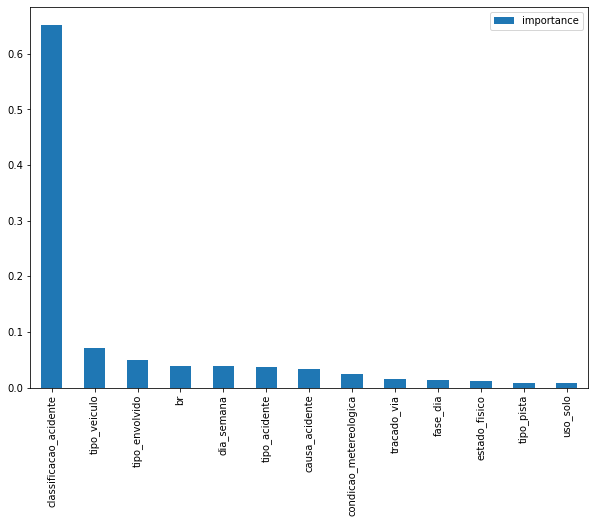

In [42]:
feat_imps.plot(kind='bar', figsize=(10,7))

plt.legend()
plt.show()

In [43]:
#Teste com o algoritmo RandomForest e os hyper parâmetros mais adequados
rfclf = RandomForestClassifier(n_estimators=120, min_samples_split=6, max_features=7, max_depth=18, criterion='gini', bootstrap=True)
rfclf.fit(X_trainset,Y_trainset)
Y_PredTE2 = rfclf.predict(X_testset)
Y_PredTR2 = rfclf.predict(X_trainset)
print('Acurácia p/ dados de Teste: {:.2f}'.format(accuracy_score(Y_testset, Y_PredTE2)))
print('Acurácia p/ dados de Treino: {:.2f}'.format(accuracy_score(Y_trainset, Y_PredTR2)))
print('Erros de classificação das amostras Teste: {}'.format((Y_testset != Y_PredTE2).sum()),'\nAmostras de teste "y": {}'.format(Y_testset.shape[0]))
print('Erros de classificação das amostras Treino: {}'.format((Y_trainset != Y_PredTR2).sum()),'\nAmostras de treino "y": {}'.format(Y_trainset.shape[0]))
print('Indice Jaccard p/ dados de Teste: {:.3f}%'.format(m.jaccard_score(Y_testset, Y_PredTE2, average='micro')))
print('Indice Jaccard p/ dados de Treino: {:.3f}%'.format(m.jaccard_score(Y_trainset, Y_PredTR2, average='micro')))

Acurácia p/ dados de Teste: 0.92
Acurácia p/ dados de Treino: 0.94
Erros de classificação das amostras Teste: 9031 
Amostras de teste "y": 116096
Erros de classificação das amostras Treino: 15576 
Amostras de treino "y": 270889
Indice Jaccard p/ dados de Teste: 0.856%
Indice Jaccard p/ dados de Treino: 0.891%


In [44]:
#Matriz de confusão
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label verdadeira')
    plt.xlabel('Label predita')

#retirada de um dos notebooks do curso de Machine learning da Cognitiveclass, assim como o bloco logo em seguida, que faz a chamada a função

In [45]:
#Cálculo da matriz de confusão
cnf_matrix_rfclf = m.confusion_matrix(Y_testset, Y_PredTE2, labels = fset.estado_fisico.unique())
np.set_printoptions(precision=2)

               precision    recall  f1-score   support

        Ileso       1.00      1.00      1.00     75362
Lesões Graves       0.57      0.14      0.22      9357
 Lesões Leves       0.78      0.97      0.86     28964
        Morto       1.00      1.00      1.00      2413

     accuracy                           0.92    116096
    macro avg       0.84      0.78      0.77    116096
 weighted avg       0.91      0.92      0.90    116096

Matriz de confusão sem normalização
[[ 1296  8061     0     0]
 [  970 27994     0     0]
 [    0     0  2413     0]
 [    0     0     0 75362]]


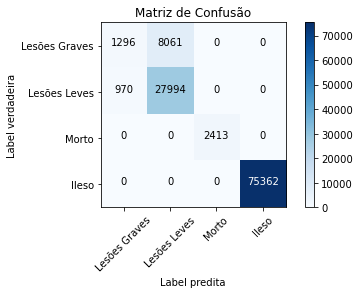

In [46]:
print (m.classification_report(Y_testset, Y_PredTE2))

# Gráfico da matriz de confusão sem normalização
plt.figure()
plot_confusion_matrix(cnf_matrix_rfclf, classes= fset.estado_fisico.unique(), normalize= False,  title='Matriz de Confusão')

In [47]:
#Montagem de um novo dataset para implementar o modelo escolhido de ML, o do RandomForest
fset2 = acidentes_pr[['dia_semana','br','causa_acidente','tipo_acidente','classificacao_acidente','fase_dia', 'condicao_metereologica', 'tipo_pista','tracado_via','uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'estado_fisico', 'sexo']].copy()
fset2.head()

,dia_semana,br,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo
0,domingo,376,Fenômenos da natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena noite,Chuva,Simples,Reta,Rural,Motocicleta,Condutor,Lesões Graves,Masculino
1,domingo,153,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino
2,domingo,153,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Condutor,Lesões Leves,Feminino
3,domingo,376,Velocidade incompatível,Saída de leito carroçável,Com Vítimas Fatais,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Automóvel,Condutor,Morto,Masculino
4,domingo,376,Velocidade incompatível,Saída de leito carroçável,Sem Vítimas,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Caminhão,Condutor,Ileso,Masculino


In [48]:
#Juntando os indices dos registros de 'estado_fisico' = 'Não Informado' na variável f1
f1 = fset2.loc[fset2['estado_fisico'] == 'Não Informado'].index
f1

Int64Index([    13,     71,     77,     80,    117,    124,    125,    129,    137,    141,
            ...
            403619, 403626, 403641, 403659, 403689, 403737, 403757, 403778, 403857, 403867], dtype='int64', length=16906)

In [49]:
#Tratamento dos registros que o estado_fisico está como Não Informado - retirando a coluna alvo (target)
fset2.drop(labels= 'estado_fisico', axis= 1, inplace= True)

In [50]:
#Transformando os valores de X2 em numéricos e normalizando os dados (X2std)
X2 = fset2.values
X2[:,0] = LE_Dia_Semana.transform(X2[:,0])
X2[:,2] = LE_Causa.transform(X2[:,2])
X2[:,3] = LE_Tipo_Acidente.transform(X2[:,3])
X2[:,4] = LE_Class_acidente.transform(X2[:,4])
X2[:,5] = LE_Fase_Dia.transform(X2[:,5])
X2[:,6] = LE_Condicao_Met.transform(X2[:,6])
X2[:,7] = LE_Tipo_Pista.transform(X2[:,7])
X2[:,8] = LE_Tracado_Via.transform(X2[:,8])
X2[:,9] = LE_Uso_Solo.transform(X2[:,9])
X2[:,10] = LE_Tipo_Veiculo.transform(X2[:,10])
X2[:,11] = LE_Tipo_Envolvido.transform(X2[:,11])
X2[:,12] = LE_Sexo.transform(X2[:,12])
X2std = std.transform(X2)

In [51]:
#O novo dataset (fset2) recebe uma nova coluna 'estado_fisico' apenas com as previsões do modelo escolhido de ML, o do RandomForest
fset2['estado_fisico'] = rfclf.predict(X2std)

In [52]:
#Verificando as colunas fset2 com a inclusão de 'estado_fisico'
fset2.columns

Index(['dia_semana', 'br', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'sexo', 'estado_fisico'], dtype='object')

In [53]:
#Verificando os valores de fset2 com a inclusão de 'estado_fisico'
fset2.values

array([['domingo', 376, 'Fenômenos da natureza', ..., 'Condutor',
        'Masculino', 'Lesões Leves'],
       ['domingo', 153, 'Animais na pista', ..., 'Passageiro',
        'Masculino', 'Lesões Leves'],
       ['domingo', 153, 'Animais na pista', ..., 'Condutor', 'Feminino',
        'Lesões Leves'],
       ...,
       ['sexta-feira', 369, 'Falta de atenção', ..., 'Condutor',
        'Masculino', 'Lesões Leves'],
       ['sexta-feira', 369, 'Outras', ..., 'Condutor', 'Feminino',
        'Ileso'],
       ['terça-feira', 376, 'Ingestão de álcool', ..., 'Condutor',
        'Masculino', 'Lesões Leves']], dtype=object)

In [54]:
#Verificando as colunas de acidentes_pr
acidentes_pr.columns

Index(['index', 'id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'estado_fisico', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos'], dtype='object')

In [55]:
acidentes_pr.iloc[:10,20]

0    Lesões Graves
1     Lesões Leves
2     Lesões Leves
3            Morto
4            Ileso
5            Ileso
6            Ileso
7    Lesões Graves
8    Lesões Graves
9    Lesões Graves
Name: estado_fisico, dtype: object

In [56]:
fset2.iloc[:10,13]

0    Lesões Leves
1    Lesões Leves
2    Lesões Leves
3           Morto
4           Ileso
5           Ileso
6           Ileso
7    Lesões Leves
8    Lesões Leves
9    Lesões Leves
Name: estado_fisico, dtype: object

In [57]:
#Atualização das informações em um novo "dataset" acidentes_pr - parte 1
with pd.option_context('max_column',45): #Usado na construção do loop para ver cada registro
    for i in f1:
        acidentes_pr.iloc[i,20] = fset2.iloc[i,13]

In [58]:
#Atualização das informações em um novo "dataset" acidentes_pr - parte 2
for i in f1:
    acidentes_pr.at[i,'estado_fisico'] = fset2.at[i,'estado_fisico']

In [59]:
#Salvando as modificações feitas do novo "dataset" acidentes_mg
acidentes_pr.to_csv(r"acidentes_pr2.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [60]:
#Verificação e ajuste dos dados em acidentes com as predições
acidentes_pr2 = pd.read_csv(r"acidentes_pr2.csv", sep=';', decimal=',', encoding = 'cp1252', low_memory=False, parse_dates = ['data_inversa'])
acidentes_pr2.drop(labels=['index'],axis= 1, inplace= True)

In [61]:
#Formatando o tipo de atributo
from numpy import int64
acidentes_pr2['id'] = acidentes_pr2.id.astype('int64')
acidentes_pr2['pesid'] = acidentes_pr2.br.astype('int64')
acidentes_pr2['ilesos'] = acidentes_pr2.ilesos.astype('int64')
acidentes_pr2['feridos_leves'] = acidentes_pr2.feridos_leves.astype('int64')
acidentes_pr2['feridos_graves'] = acidentes_pr2.feridos_graves.astype('int64')
acidentes_pr2['mortos'] = acidentes_pr2.mortos.astype('int64')

In [62]:
#Verificando o dataset modificado de acidentes
acidentes_pr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403891 entries, 0 to 403890
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      403891 non-null  int64         
 1   pesid                   403891 non-null  int64         
 2   data_inversa            403891 non-null  datetime64[ns]
 3   dia_semana              403891 non-null  object        
 4   horario                 403891 non-null  object        
 5   uf                      403891 non-null  object        
 6   br                      403891 non-null  int64         
 7   km                      403891 non-null  object        
 8   municipio               403891 non-null  object        
 9   causa_acidente          403891 non-null  object        
 10  tipo_acidente           403891 non-null  object        
 11  classificacao_acidente  403891 non-null  object        
 12  fase_dia                403891

In [63]:
#Verificando o dataset novamente modificado de acidentes
acidentes_pr2.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,ilesos,feridos_leves,feridos_graves,mortos
0,8,376,2017-01-01,domingo,00:00:00,PR,376,112,PARANAVAI,Fenômenos da natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena noite,Chuva,Simples,Reta,Rural,Motocicleta,Condutor,Lesões Graves,Masculino,0,0,1,0
1,11,153,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino,0,1,0,0
2,11,153,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Condutor,Lesões Leves,Feminino,0,1,0,0
3,20,376,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade incompatível,Saída de leito carroçável,Com Vítimas Fatais,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Automóvel,Condutor,Morto,Masculino,0,0,0,1
4,20,376,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade incompatível,Saída de leito carroçável,Sem Vítimas,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Caminhão,Condutor,Ileso,Masculino,1,0,0,0


In [64]:
#Convertendo 'estado_fisico' numa variável dummy 'vitimas'
vitimas = pd.get_dummies(acidentes_pr2['estado_fisico'])
vitimas

,Ileso,Lesões Graves,Lesões Leves,Morto
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
403886,1,0,0,0
403887,1,0,0,0
403888,0,0,1,0
403889,1,0,0,0


In [65]:
#Elimiando as colunas de'ilesos','feridos_leves','feridos_graves','mortos' de acidentes_mg
acidentes_pr2.drop(labels=['ilesos','feridos_leves','feridos_graves','mortos'],axis= 1, inplace = True)

In [66]:
#Unindo acidentes_mg com a variável dummy 'vitimas'
acidentes_pr2 = pd.concat([acidentes_pr2, vitimas], axis= 1, join='outer')

In [67]:
#Verificando o dataset novamente modificado de acidentes
acidentes_pr2.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,Ileso,Lesões Graves,Lesões Leves,Morto
0,8,376,2017-01-01,domingo,00:00:00,PR,376,112,PARANAVAI,Fenômenos da natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena noite,Chuva,Simples,Reta,Rural,Motocicleta,Condutor,Lesões Graves,Masculino,0,1,0,0
1,11,153,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino,0,0,1,0
2,11,153,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Condutor,Lesões Leves,Feminino,0,0,1,0
3,20,376,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade incompatível,Saída de leito carroçável,Com Vítimas Fatais,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Automóvel,Condutor,Morto,Masculino,0,0,0,1
4,20,376,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade incompatível,Saída de leito carroçável,Sem Vítimas,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Caminhão,Condutor,Ileso,Masculino,1,0,0,0


In [68]:
#Renomeando as colunas de acidentes
acidentes_pr2.rename(mapper={'Ileso':'ilesos', 'Lesões Leves':'feridos_leves', 'Lesões Graves':'feridos_graves','Morto':'mortos'}, axis= 1, inplace= True)

In [69]:
#Verificando o dataset novamente modificado de acidentes
acidentes_pr2.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,ilesos,feridos_graves,feridos_leves,mortos
0,8,376,2017-01-01,domingo,00:00:00,PR,376,112,PARANAVAI,Fenômenos da natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena noite,Chuva,Simples,Reta,Rural,Motocicleta,Condutor,Lesões Graves,Masculino,0,1,0,0
1,11,153,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino,0,0,1,0
2,11,153,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Condutor,Lesões Leves,Feminino,0,0,1,0
3,20,376,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade incompatível,Saída de leito carroçável,Com Vítimas Fatais,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Automóvel,Condutor,Morto,Masculino,0,0,0,1
4,20,376,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade incompatível,Saída de leito carroçável,Sem Vítimas,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Caminhão,Condutor,Ileso,Masculino,1,0,0,0


In [70]:
#Verificando o dataset novamente modificado de acidentes
acidentes_pr2['estado_fisico'].value_counts()

Ileso            268262
Lesões Leves      96505
Lesões Graves     31064
Morto              8060
Name: estado_fisico, dtype: int64

In [71]:
#Confirmando os valores alterados de acidentes
print('Total de pessoas envolvidas: ', acidentes_pr2['id'].count())
print('Ilesos: ',acidentes_pr2.ilesos.sum())
print('Feridos Leves: ',acidentes_pr2.feridos_leves.sum())
print('Feridos Graves: ',acidentes_pr2.feridos_graves.sum())
print('Mortos: ',acidentes_pr2.mortos.sum())

Total de pessoas envolvidas:  403891
Ilesos:  268262
Feridos Leves:  96505
Feridos Graves:  31064
Mortos:  8060


In [72]:
#Confirmando a estrutura de acidentes
acidentes_pr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403891 entries, 0 to 403890
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      403891 non-null  int64         
 1   pesid                   403891 non-null  int64         
 2   data_inversa            403891 non-null  datetime64[ns]
 3   dia_semana              403891 non-null  object        
 4   horario                 403891 non-null  object        
 5   uf                      403891 non-null  object        
 6   br                      403891 non-null  int64         
 7   km                      403891 non-null  object        
 8   municipio               403891 non-null  object        
 9   causa_acidente          403891 non-null  object        
 10  tipo_acidente           403891 non-null  object        
 11  classificacao_acidente  403891 non-null  object        
 12  fase_dia                403891

In [73]:
#Verificando que não existem valores nulos
acidentes_pr2.isnull().sum()

id                        0
pesid                     0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
tipo_veiculo              0
tipo_envolvido            0
estado_fisico             0
sexo                      0
ilesos                    0
feridos_graves            0
feridos_leves             0
mortos                    0
dtype: int64

In [74]:
#Salvando as modificações feitas do novo "dataset" acidentes_pr
acidentes_pr2.to_csv(r"acidentes_pr3.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

3a Seção - Aplicação do algoritmo para forecast

In [75]:
#Lendo os arquivos de acidentes e datatran
#datatran_pr = pd.read_csv(r"datatran_pr.csv", sep=';', decimal=',', encoding = 'cp1252', parse_dates = ['data_inversa'])
acidentes_pr = pd.read_csv(r"acidentes_pr3.csv", sep=';', decimal=',', encoding = 'cp1252', parse_dates = ['data_inversa'])

In [76]:
acidentes_pr.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'estado_fisico', 'sexo', 'ilesos', 'feridos_graves', 'feridos_leves', 'mortos'], dtype='object')

In [77]:
acidentes_pr['mes'] = ""
acidentes_pr['ano'] = ""

In [78]:
acidentes_pr['ano'] = acidentes_pr['data_inversa'].dt.year
acidentes_pr['mes'] = acidentes_pr['data_inversa'].dt.month

In [79]:
acidentes_pr.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,ilesos,feridos_graves,feridos_leves,mortos,mes,ano
0,8,376,2017-01-01,domingo,00:00:00,PR,376,112,PARANAVAI,Fenômenos da natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena noite,Chuva,Simples,Reta,Rural,Motocicleta,Condutor,Lesões Graves,Masculino,0,1,0,0,1,2017
1,11,153,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino,0,0,1,0,1,2017
2,11,153,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Condutor,Lesões Leves,Feminino,0,0,1,0,1,2017
3,20,376,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade incompatível,Saída de leito carroçável,Com Vítimas Fatais,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Automóvel,Condutor,Morto,Masculino,0,0,0,1,1,2017
4,20,376,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade incompatível,Saída de leito carroçável,Sem Vítimas,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Caminhão,Condutor,Ileso,Masculino,1,0,0,0,1,2017


In [80]:
acidentes_pr.tail()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,ilesos,feridos_graves,feridos_leves,mortos,mes,ano
403886,83383812,376,2015-07-08,sexta-feira,14:00:00,PR,376,633,SAO JOSE DOS PINHAIS,Falta de atenção,Colisão lateral,Sem Vítimas,Pleno dia,Sol,Dupla,Reta,Rural,Caminhão,Condutor,Ileso,Masculino,1,0,0,0,7,2015
403887,83383830,369,2015-07-08,sexta-feira,13:50:00,PR,369,174.1,ROLANDIA,Falta de atenção,Colisão transversal,Sem Vítimas,Pleno dia,Céu Claro,Simples,Reta,Urbano,Caminhonete,Condutor,Ileso,Masculino,1,0,0,0,7,2015
403888,83383830,369,2015-07-08,sexta-feira,13:50:00,PR,369,174.1,ROLANDIA,Falta de atenção,Colisão transversal,Com Vítimas Feridas,Pleno dia,Céu Claro,Simples,Reta,Urbano,Motoneta,Condutor,Lesões Leves,Masculino,0,0,1,0,7,2015
403889,83383835,369,2015-07-08,sexta-feira,15:40:00,PR,369,468,CORBELIA,Outras,Colisão com objeto estático,Sem Vítimas,Pleno dia,Sol,Simples,Reta,Rural,Automóvel,Condutor,Ileso,Feminino,1,0,0,0,7,2015
403890,83383836,376,2015-04-08,terça-feira,01:00:00,PR,376,341,ORTIGUEIRA,Ingestão de álcool,Tombamento,Com Vítimas Feridas,Plena noite,Céu Claro,Simples,Curva,Rural,Caminhão-trator,Condutor,Lesões Leves,Masculino,0,0,1,0,4,2015


In [81]:
acidentes_pr.groupby(acidentes_pr['ano'])['id'].nunique()

ano
2007     7118
2008     9688
2009    15609
2010    20984
2011    22189
2012    20749
2013    19788
2014    17172
2015     8105
2016    11032
2017    10674
2018     7946
2019     7696
2020     7146
Name: id, dtype: int64

In [82]:
acidentes_pr.groupby(acidentes_pr['mes'])['id'].nunique()

mes
1     15351
2     14373
3     15458
4     15111
5     15924
6     15590
7     16250
8     15305
9     15259
10    15419
11    14911
12    16871
Name: id, dtype: int64

In [83]:
acidentes_pr.groupby([acidentes_pr['ano'], acidentes_pr['mes']])['id'].nunique()

ano   mes
2007  1       654
      2       528
      3       583
      4       547
      5       573
      6       566
      7       615
      8       612
      9       605
      10      621
      11      588
      12      626
2008  1       813
      2       733
      3       734
      4       755
      5       705
      6       762
      7       787
      8       796
      9       931
      10      834
      11      839
      12      999
2009  1      1061
      2       997
      3      1000
      4       961
      5      1352
      6      1373
      7      1387
      8      1416
      9      1356
      10     1423
      11     1519
      12     1764
2010  1      1652
      2      1538
      3      1733
      4      1764
      5      1771
      6      1589
      7      1880
      8      1720
      9      1743
      10     1780
      11     1762
      12     2052
2011  1      1890
      2      1650
      3      1786
      4      1865
      5      1890
      6      1892
      7      1960


#Análise com Prophet - Predição de vítimas

In [84]:
#Criando o conjunto de com time series
count = Counter(acidentes_pr.data_inversa)

In [85]:
lista_idx = list()
valor = list()
for i,x in dict(count).items():
    lista_idx.append(i)
    valor.append(x)
#print(valor)

In [86]:
df       = pd.DataFrame() 
df["ds"] = lista_idx
#df['y']  = preprocessing.minmax_scale( np.reshape(valor,(-1,1) ))#, columns=cols) #
df['y']  = np.reshape(valor,(-1,1) )
df.head()

,ds,y
0,2017-01-01,107
1,2007-01-01,40
2,2016-01-01,72
3,2017-02-01,110
4,2017-03-01,92


In [87]:
df.to_csv("df_vitimas.csv", index=False, header=True, sep=';', decimal='.', encoding='cp1252')

In [88]:
#Criando o modelo de predição de vítimas
model_vitimas = Prophet()
model_vitimas.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [89]:
#Fazendo a predição para os próximos 30 anos
future = model_vitimas.make_future_dataframe(periods=10950)
future.tail()

,ds
15913,2050-12-20
15914,2050-12-21
15915,2050-12-22
15916,2050-12-23
15917,2050-12-24


In [90]:
#Fazendo a predição para vítimas de acidentes de trânsito
forecast = model_vitimas.predict(future)

In [91]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
15913,2050-12-20,-116.8854,-955.3656,732.6547
15914,2050-12-21,-113.8837,-946.6575,740.9464
15915,2050-12-22,-110.7709,-955.3594,747.0940
15916,2050-12-23,-101.5212,-930.1396,760.8654
15917,2050-12-24,-100.8819,-925.6792,759.7877


In [92]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
15913,2050-12-20,-127.8936,-955.3656,732.6547,-954.5556,719.8282,11.0082,11.0082,11.0082,-7.6761,-7.6761,-7.6761,18.6843,18.6843,18.6843,0.0,0.0,0.0,-116.8854
15914,2050-12-21,-127.9089,-946.6575,740.9464,-954.6000,719.9340,14.0252,14.0252,14.0252,-5.1243,-5.1243,-5.1243,19.1495,19.1495,19.1495,0.0,0.0,0.0,-113.8837
15915,2050-12-22,-127.9243,-955.3594,747.0940,-954.6444,720.0399,17.1534,17.1534,17.1534,-2.2299,-2.2299,-2.2299,19.3832,19.3832,19.3832,0.0,0.0,0.0,-110.7709
15916,2050-12-23,-127.9397,-930.1396,760.8654,-954.6889,720.1458,26.4185,26.4185,26.4185,7.0354,7.0354,7.0354,19.3831,19.3831,19.3831,0.0,0.0,0.0,-101.5212
15917,2050-12-24,-127.9550,-925.6792,759.7877,-954.7333,720.2516,27.0732,27.0732,27.0732,7.9217,7.9217,7.9217,19.1514,19.1514,19.1514,0.0,0.0,0.0,-100.8819


In [93]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2007-01-01,43.7982,8.3431,77.1985
1,2007-01-02,38.0138,6.2398,72.8447
2,2007-01-03,38.9985,4.2225,72.1080
3,2007-01-04,40.3340,5.2253,71.7961
4,2007-01-05,48.0757,14.8371,81.8375


In [94]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-01-01,36.6329,8.3431,77.1985,36.6329,36.6329,7.1653,7.1653,7.1653,-3.4385,-3.4385,-3.4385,10.6038,10.6038,10.6038,0.0,0.0,0.0,43.7982
1,2007-01-02,36.6563,6.2398,72.8447,36.6563,36.6563,1.3575,1.3575,1.3575,-7.6761,-7.6761,-7.6761,9.0335,9.0335,9.0335,0.0,0.0,0.0,38.0138
2,2007-01-03,36.6797,4.2225,72.1080,36.6797,36.6797,2.3188,2.3188,2.3188,-5.1243,-5.1243,-5.1243,7.4431,7.4431,7.4431,0.0,0.0,0.0,38.9985
3,2007-01-04,36.7031,5.2253,71.7961,36.7031,36.7031,3.6309,3.6309,3.6309,-2.2299,-2.2299,-2.2299,5.8608,5.8608,5.8608,0.0,0.0,0.0,40.3340
4,2007-01-05,36.7265,14.8371,81.8375,36.7265,36.7265,11.3492,11.3492,11.3492,7.0354,7.0354,7.0354,4.3138,4.3138,4.3138,0.0,0.0,0.0,48.0757


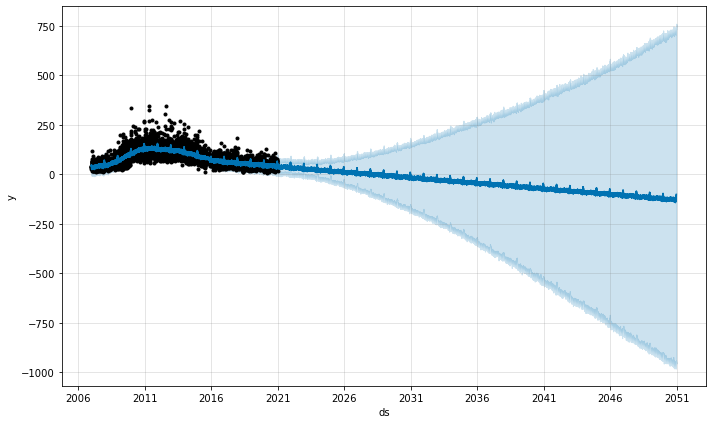

In [95]:
#Plot com predição de vítimas
fig1 = model_vitimas.plot(forecast)

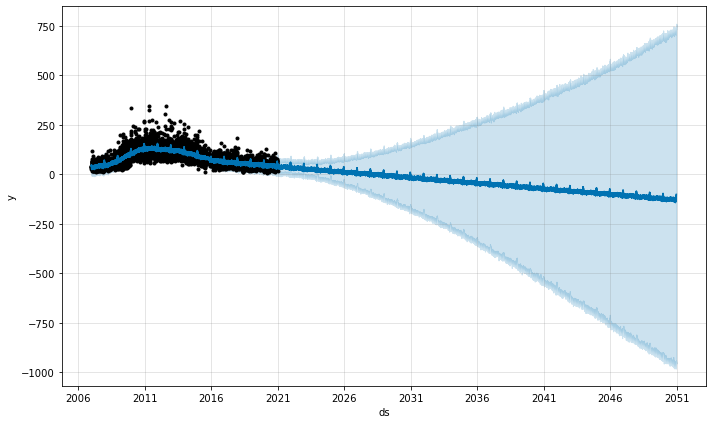

In [96]:
fig1_1 = model_vitimas.plot(forecast, uncertainty=True)

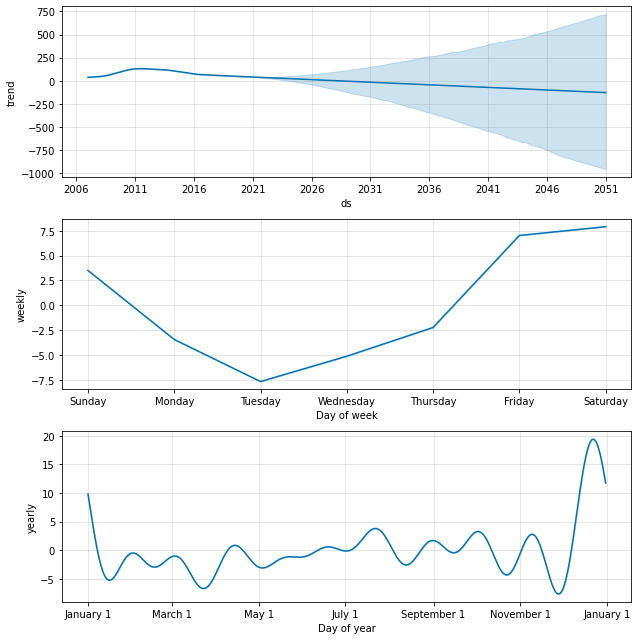

In [97]:
#Plot predição por ano, dia e mês
fig2 = model_vitimas.plot_components(forecast)

In [118]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("forecast_vitimas.csv", index=False, header=True, sep=';', decimal='.', encoding='cp1252')

In [ ]:
fig1.savefig('fig1_vit')

In [ ]:
fig2.savefig('fig2_vit')

#Análise com Prophet - Predição de acidentes

In [98]:
#Ajustando o dataset

acidentes_pr_2 = acidentes_pr.drop_duplicates(["id","data_inversa"])

print(len(acidentes_pr), len(acidentes_pr_2))

403891 185896


In [99]:
#Criando o conjunto de com time series
count_acid = Counter(acidentes_pr_2.data_inversa)

lista_idx = list()
valor = list()
for i,x in dict(count_acid).items():
    lista_idx.append(i)
    valor.append(x)

df_acid       = pd.DataFrame() 
df_acid["ds"] = lista_idx
df_acid['y']  = valor

In [100]:
df_acid.head()

,ds,y
0,2017-01-01,36
1,2007-01-01,20
2,2016-01-01,32
3,2017-02-01,33
4,2017-03-01,24


In [101]:
df_acid.to_csv("df_acidentes.csv", index=False, header=True, sep=';', decimal='.', encoding='cp1252')

In [102]:
#Criando o modelo de predição de acidentes
model_acid = Prophet()
model_acid.fit(df_acid)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [103]:
#Fazendo a predição para os próximos 30 anos
future_acid = model_acid.make_future_dataframe(periods=10950)

In [104]:
#Fazendo a predição para acidentes de trânsito
forecast_acid = model_acid.predict(future_acid)

In [105]:
forecast_acid[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2007-01-01,18.9029,5.2037,32.5565
1,2007-01-02,16.7420,1.4130,32.2563
2,2007-01-03,17.2166,2.9340,30.8048
3,2007-01-04,18.1640,4.4868,32.0306
4,2007-01-05,21.1503,6.6062,34.9686


In [106]:
forecast_acid.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-01-01,17.6431,5.2037,32.5565,17.6431,17.6431,1.2598,1.2598,1.2598,-1.3085,-1.3085,-1.3085,2.5683,2.5683,2.5683,0.0,0.0,0.0,18.9029
1,2007-01-02,17.6547,1.4130,32.2563,17.6547,17.6547,-0.9127,-0.9127,-0.9127,-2.9493,-2.9493,-2.9493,2.0366,2.0366,2.0366,0.0,0.0,0.0,16.7420
2,2007-01-03,17.6663,2.9340,30.8048,17.6663,17.6663,-0.4498,-0.4498,-0.4498,-1.9564,-1.9564,-1.9564,1.5066,1.5066,1.5066,0.0,0.0,0.0,17.2166
3,2007-01-04,17.6780,4.4868,32.0306,17.6780,17.6780,0.4860,0.4860,0.4860,-0.5011,-0.5011,-0.5011,0.9871,0.9871,0.9871,0.0,0.0,0.0,18.1640
4,2007-01-05,17.6896,6.6062,34.9686,17.6896,17.6896,3.4607,3.4607,3.4607,2.9746,2.9746,2.9746,0.4861,0.4861,0.4861,0.0,0.0,0.0,21.1503


In [107]:
forecast_acid[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
15913,2050-12-20,-48.5848,-453.3655,343.7511
15914,2050-12-21,-47.5529,-456.3873,348.5664
15915,2050-12-22,-46.1320,-450.2106,349.1029
15916,2050-12-23,-42.7635,-444.9504,352.9468
15917,2050-12-24,-42.6054,-450.7283,351.7410


In [108]:
forecast_acid.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
15913,2050-12-20,-51.7302,-453.3655,343.7511,-458.7565,342.2914,3.1453,3.1453,3.1453,-2.9493,-2.9493,-2.9493,6.0946,6.0946,6.0946,0.0,0.0,0.0,-48.5848
15914,2050-12-21,-51.7365,-456.3873,348.5664,-458.7981,342.3529,4.1836,4.1836,4.1836,-1.9564,-1.9564,-1.9564,6.1400,6.1400,6.1400,0.0,0.0,0.0,-47.5529
15915,2050-12-22,-51.7428,-450.2106,349.1029,-458.8397,342.4143,5.6108,5.6108,5.6108,-0.5011,-0.5011,-0.5011,6.1119,6.1119,6.1119,0.0,0.0,0.0,-46.1320
15916,2050-12-23,-51.7492,-444.9504,352.9468,-458.8812,342.4758,8.9857,8.9857,8.9857,2.9746,2.9746,2.9746,6.0111,6.0111,6.0111,0.0,0.0,0.0,-42.7635
15917,2050-12-24,-51.7555,-450.7283,351.7410,-458.9228,342.5373,9.1501,9.1501,9.1501,3.3105,3.3105,3.3105,5.8396,5.8396,5.8396,0.0,0.0,0.0,-42.6054


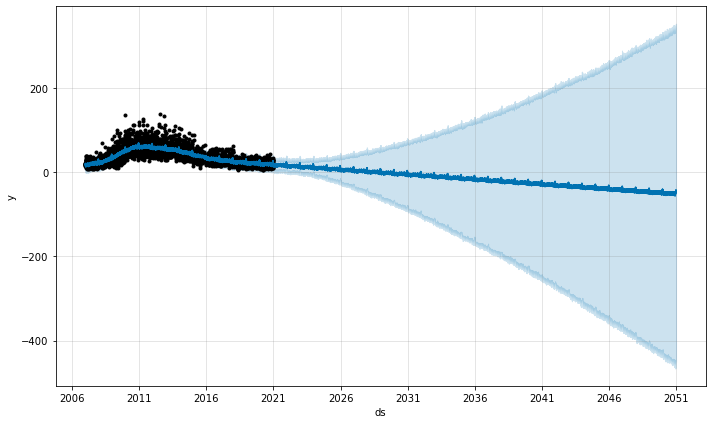

In [109]:
#Plot com a predição de acidentes
fig1 = model_acid.plot(forecast_acid)

In [110]:
fig1.savefig('fig1')

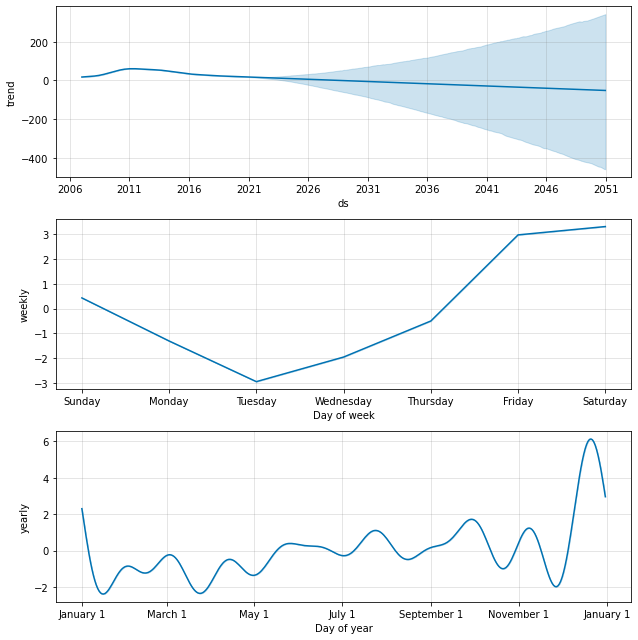

In [111]:
#Plot com a predição de acidentes por ano, dia e mês
fig2 = model_acid.plot_components(forecast_acid)

In [112]:
fig2.savefig('fig2')

In [113]:
forecast_acid[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("forecast_acidentes.csv", index=False, header=True, sep=';', decimal='.', encoding='cp1252')

In [114]:
teste = pd.read_csv("forecast_acidentes.csv", sep=';', decimal=',', encoding = 'cp1252', parse_dates = ['ds'])

In [115]:
teste.head(100)

,ds,yhat,yhat_lower,yhat_upper
0,2007-01-01,18.902883973048908,5.2037006652922155,32.55651488465703
1,2007-01-02,16.741972740311525,1.4129529255244855,32.256341304560394
2,2007-01-03,17.21655984077127,2.934038600561641,30.804833699338076
3,2007-01-04,18.16397932870251,4.486813995741173,32.030558024952626
4,2007-01-05,21.150256734634947,6.606203898028363,34.96863698075753
5,2007-01-06,21.02260561899885,6.437475472408187,34.68521971663173
6,2007-01-07,17.711306880111426,3.2916300965267107,32.2498199259236
7,2007-01-08,15.579197545768253,1.4563551195958948,29.72495190205721
8,2007-01-09,13.587786177463622,-0.3083342607619475,27.372896600298464
9,2007-01-10,14.276025873085604,0.5927899560890243,29.23801741041607


In [117]:
teste.tail(100)

,ds,yhat,yhat_lower,yhat_upper
15818,2050-09-16,-47.450350540991636,-450.0652420701032,340.12139131106125
15819,2050-09-17,-47.0342137441709,-449.0059015804245,338.8125274552468
15820,2050-09-18,-49.82758466388473,-450.22037362976596,339.71472582896047
15821,2050-09-19,-51.474752907252544,-446.81165337702305,338.82284018891806
15822,2050-09-20,-53.020649882827016,-455.3873749526053,337.3429074938926
15823,2050-09-21,-51.93196786850769,-450.282034957232,338.6507965157926
15824,2050-09-22,-50.382390984907964,-452.39371620043534,342.67322565572226
15825,2050-09-23,-46.81658802142415,-447.2913457840415,334.33429533796806
15826,2050-09-24,-46.39747872052166,-450.4199266194624,345.81978226407404
15827,2050-09-25,-49.20413005570984,-446.73947084639263,339.3228899192525


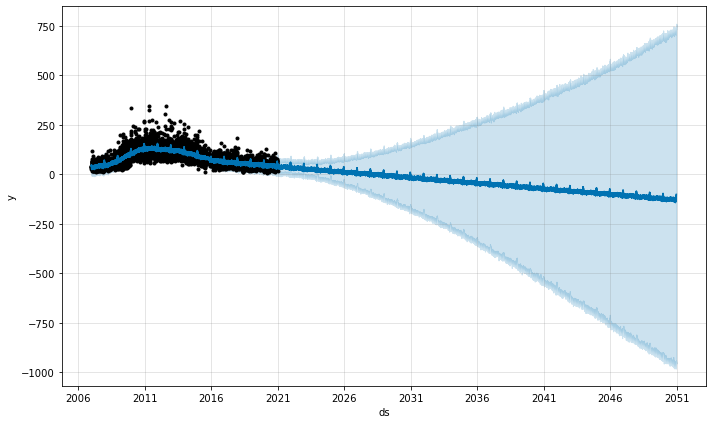

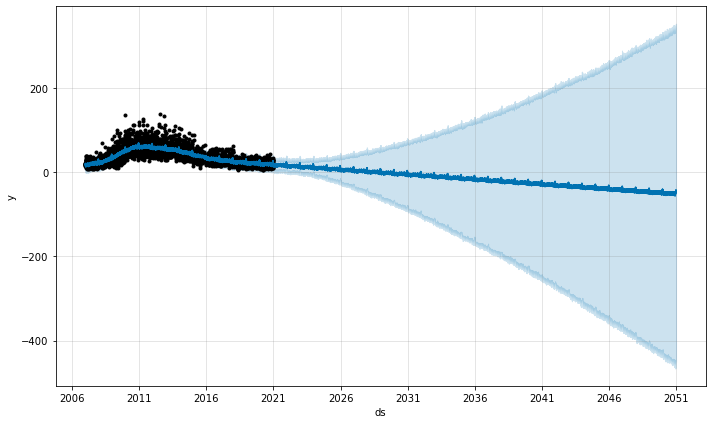

In [116]:
#Plot com a predição de vitimas e acidentes
f = model_vitimas.plot(forecast)
g = model_acid.plot(forecast_acid)

4a Seção - Aplicação dos fatores de redução

In [195]:
#Lendo os arquivos de acidentes e datatran
#datatran_pr = pd.read_csv(r"datatran_pr.csv", sep=';', decimal=',', encoding = 'cp1252', parse_dates = ['data_inversa'])
acidentes_pr = pd.read_csv(r"acidentes_pr3.csv", sep=';', decimal=',', encoding = 'cp1252', parse_dates = ['data_inversa'])

In [196]:
pista = acidentes_pr.id.groupby([acidentes_pr.tipo_pista]).nunique()
print(pista)

tipo_pista
Dupla            99893
Múltipla         10212
Não Informado        1
Simples          75432
Name: id, dtype: int64


In [197]:
acidentes_pr.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,ilesos,feridos_graves,feridos_leves,mortos
0,8,376,2017-01-01,domingo,00:00:00,PR,376,112,PARANAVAI,Fenômenos da natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena noite,Chuva,Simples,Reta,Rural,Motocicleta,Condutor,Lesões Graves,Masculino,0,1,0,0
1,11,153,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino,0,0,1,0
2,11,153,2017-01-01,domingo,00:00:00,PR,153,"56,9",SANTO ANTONIO DA PLATINA,Animais na pista,Capotamento,Com Vítimas Feridas,Plena noite,Garoa/chuvisco,Simples,Reta,Rural,Automóvel,Condutor,Lesões Leves,Feminino,0,0,1,0
3,20,376,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade incompatível,Saída de leito carroçável,Com Vítimas Fatais,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Automóvel,Condutor,Morto,Masculino,0,0,0,1
4,20,376,2017-01-01,domingo,01:00:00,PR,376,636,TIJUCAS DO SUL,Velocidade incompatível,Saída de leito carroçável,Sem Vítimas,Plena noite,Garoa/chuvisco,Dupla,Curva,Rural,Caminhão,Condutor,Ileso,Masculino,1,0,0,0


In [198]:
acidentes_pr['mes'] = ""
acidentes_pr['ano'] = ""
acidentes_pr['ano'] = acidentes_pr['data_inversa'].dt.year
acidentes_pr['mes'] = acidentes_pr['data_inversa'].dt.month

In [199]:
acidentes_pr.tail()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,ilesos,feridos_graves,feridos_leves,mortos,mes,ano
403886,83383812,376,2015-07-08,sexta-feira,14:00:00,PR,376,633,SAO JOSE DOS PINHAIS,Falta de atenção,Colisão lateral,Sem Vítimas,Pleno dia,Sol,Dupla,Reta,Rural,Caminhão,Condutor,Ileso,Masculino,1,0,0,0,7,2015
403887,83383830,369,2015-07-08,sexta-feira,13:50:00,PR,369,174.1,ROLANDIA,Falta de atenção,Colisão transversal,Sem Vítimas,Pleno dia,Céu Claro,Simples,Reta,Urbano,Caminhonete,Condutor,Ileso,Masculino,1,0,0,0,7,2015
403888,83383830,369,2015-07-08,sexta-feira,13:50:00,PR,369,174.1,ROLANDIA,Falta de atenção,Colisão transversal,Com Vítimas Feridas,Pleno dia,Céu Claro,Simples,Reta,Urbano,Motoneta,Condutor,Lesões Leves,Masculino,0,0,1,0,7,2015
403889,83383835,369,2015-07-08,sexta-feira,15:40:00,PR,369,468,CORBELIA,Outras,Colisão com objeto estático,Sem Vítimas,Pleno dia,Sol,Simples,Reta,Rural,Automóvel,Condutor,Ileso,Feminino,1,0,0,0,7,2015
403890,83383836,376,2015-04-08,terça-feira,01:00:00,PR,376,341,ORTIGUEIRA,Ingestão de álcool,Tombamento,Com Vítimas Feridas,Plena noite,Céu Claro,Simples,Curva,Rural,Caminhão-trator,Condutor,Lesões Leves,Masculino,0,0,1,0,4,2015


In [200]:
acidentes_pr.groupby(acidentes_pr['ano'])['id'].nunique()

ano
2007     7118
2008     9688
2009    15609
2010    20984
2011    22189
2012    20749
2013    19788
2014    17172
2015     8105
2016    11032
2017    10674
2018     7946
2019     7696
2020     7146
Name: id, dtype: int64

In [201]:
acidentes_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403891 entries, 0 to 403890
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      403891 non-null  int64         
 1   pesid                   403891 non-null  int64         
 2   data_inversa            403891 non-null  datetime64[ns]
 3   dia_semana              403891 non-null  object        
 4   horario                 403891 non-null  object        
 5   uf                      403891 non-null  object        
 6   br                      403891 non-null  int64         
 7   km                      403891 non-null  object        
 8   municipio               403891 non-null  object        
 9   causa_acidente          403891 non-null  object        
 10  tipo_acidente           403891 non-null  object        
 11  classificacao_acidente  403891 non-null  object        
 12  fase_dia                403891

In [202]:
acidentes_pr['ano'].value_counts()

2011    48580
2012    45218
2010    44081
2013    43959
2014    37784
2009    31926
2016    23974
2017    23789
2008    19420
2018    18266
2019    18230
2015    17929
2020    15862
2007    14873
Name: ano, dtype: int64

In [205]:
acidentes_pr.loc[acidentes_pr['tipo_pista'] == 'Simples', 'mortos'].sum()

4735

In [208]:
acidentes_pr.loc[acidentes_pr['ano'] == 2020, 'mortos'].sum()

526

In [209]:
mortos = acidentes_pr.loc[(acidentes_pr['tipo_pista'] == 'Simples') & (acidentes_pr['ano'] == 2020), 'mortos'].sum()
print(mortos)

269


In [211]:
acidentes_pr.loc[acidentes_pr['tipo_pista'] == 'Simples', 'feridos_leves'].sum()

44139

In [212]:
acidentes_pr.loc[acidentes_pr['tipo_pista'] == 'Simples', 'feridos_graves'].sum()

16168

In [213]:
feridos_leves = acidentes_pr.loc[(acidentes_pr['tipo_pista'] == 'Simples') & (acidentes_pr['ano'] == 2020), 'feridos_leves'].sum()
print(feridos_leves)

2183


In [214]:
feridos_graves = acidentes_pr.loc[(acidentes_pr['tipo_pista'] == 'Simples') & (acidentes_pr['ano'] == 2020), 'feridos_graves'].sum()
print(feridos_graves)

851


In [215]:
feridos = feridos_leves + feridos_graves
print(feridos)

3034


In [227]:
efeitodup=0.2584
reducao_mortes = mortos*efeitodup
mortes_apos_dup = mortos - reducao_mortes
#print(reducao_mortes)
print("Quantidade de Mortos (data base ano de 2020): \n Antes da duplicação das pistas: " + str(mortos) + "\n " + "Após duplicação das pistas: " + str(mortes_apos_dup))

Quantidade de Mortos (data base ano de 2020): 
 Antes da duplicação das pistas: 269
 Após duplicação das pistas: 199.4904


In [228]:
efeitodupferidos=0.3559
reducao_feridos = feridos*efeitodupferidos
feridos_apos_dup = feridos - reducao_feridos
#print(reducao_feridos)
print("Quantidade de Feridos (data base ano de 2020): \n Antes da duplicação das pistas: " + str(feridos) + "\n " + "Após duplicação das pistas: " + str(feridos_apos_dup))

Quantidade de Feridos (data base ano de 2020): 
 Antes da duplicação das pistas: 3034
 Após duplicação das pistas: 1954.1994


In [219]:
rodovol=2743909.21
valor_das_vidas_antes_reducao="R${:,.2f}".format(rodovol*mortos)
valor_das_vidas_apos_reducao="R${:,.2f}".format(rodovol*(mortos-reducao_mortes))
print("Valoração social das vidas - Mortes (data base ano de 2020): \n Antes da duplicação das pistas: " + str(valor_das_vidas_antes_reducao) + "\n " + "Após duplicação das pistas: " + str(valor_das_vidas_apos_reducao))

Valoração social das vidas - Mortes (data base ano de 2020): 
 Antes da duplicação das pistas: R$738,111,577.49
 Após duplicação das pistas: R$547,383,545.87


In [221]:
rodoferidos=123268.00
valor_de_feridos_antes_reducao="R${:,.2f}".format(rodoferidos*feridos)
valor_de_feridos_apos_reducao="R${:,.2f}".format(rodoferidos*(feridos-reducao_feridos))
print("Valoração social das vidas - Feridos (data base ano de 2020): \n Antes da duplicação das pistas: " + str(valor_de_feridos_antes_reducao) + "\n " + "Após duplicação das pistas: " + str(valor_de_feridos_apos_reducao))

Valoração social das vidas - Feridos (data base ano de 2020): 
 Antes da duplicação das pistas: R$373,995,112.00
 Após duplicação das pistas: R$240,890,251.64
